## 贝叶斯分类器

用贝叶斯决策作为分类的分类器称为贝叶斯分类器。通过某个对象的先验概率，利用贝叶斯公式计算出其后验概率，即该对象属于某一类别的概率，选择具有最大后验概率的类作为该对象所属的类。

在朴素贝叶斯分类器中，要学习的参数为：先验概率和类条件概率密度。

在scikit-learn中有以下三种常用的朴素贝叶斯分类器，它们的主要区别在于假设了不同的类条件概率密度分布的形式：

#### 1、GaussianNB，高斯贝叶斯分类器。它假设特征的条件概率分布满足高斯分布：

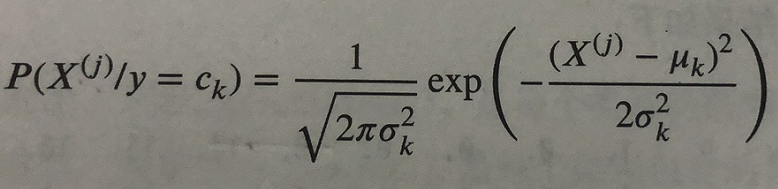

#### 2、MultinomialNB，多项式贝叶斯分类器。它假设特征的条件概率分布满足多项式分布：

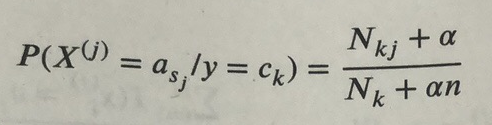

#### 3、BernoulliNB，伯努利贝叶斯分布。它假设特征的条件概率满足二项式分布：

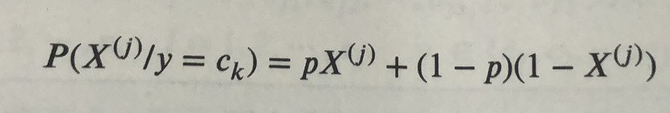

多项式和伯努利模型都是适用于离散特征的情况。

#### Python代码如下：

#### 1.导入所需要的模块

In [88]:
from sklearn import datasets,naive_bayes
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB    #导入三种朴素贝叶斯分类器
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#计算程序运行时间
import timeit

In [89]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#### 2.使用的数据集为scikit-learn自带的手写识别数据集

数据说明：digits数据集是bunch类型，可以动态地加入任何想要的属性。通过keys函数查看digits中所有的类型。其中images是一个8*8的数据矩阵，
用来存放图片。target是该条数据的标签。target_names是包含该数据集中所有标签类型的列表。data是将images中的每个数据按行展开
成一行64列的数据。DESCR包括了数据集的来源、作者和描述。该数据集中共有1797条数据。对数据集中的不同分类绘制柱形图，可以发现
该数据集中不同的数字分布较为平均，可以直接用来训练

In [90]:
from sklearn.datasets import load_digits
digits = load_digits()

In [91]:
digits.images.shape    #查看数据维度

(1797, 8, 8)

In [92]:
print(digits.images[0].shape)    #查看第一张图
print(digits.images[0])

(8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


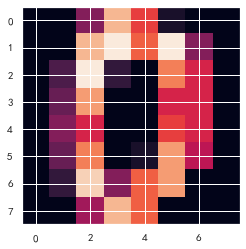

In [93]:
plt.imshow(digits.images[0])    #绘制第一张图
plt.show()

#### 3.加载并查看手写识别数据集

vector from images 0: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


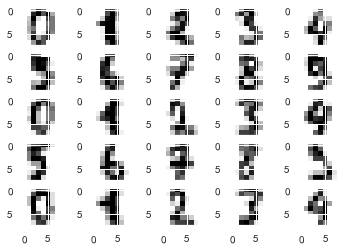

In [94]:
def load_data():    #加载数据集
    digits=datasets.load_digits()
    return model_selection.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)
    #返回为: 一个元组，依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记 
    #model_selection为分层采用，分层采样保证了测试样本集中各类别样本的比例与原始样本集中各类别样本的比例相同
def show_digits():    #查看scikit-learn自带的手写识别数据集
    digits=datasets.load_digits()
    fig=plt.figure()
    print("vector from images 0:",digits.data[0])
    for i in range(25):    #绘制数据集中前 25 个样本的图片,输出图片
        ax=fig.add_subplot(5,5,i+1)
        ax.imshow(digits.images[i],cmap=plt.cm.gray_r,interpolation='nearest')
    plt.show()

show_digits()

In [95]:
X = digits.data    #读取特征数据
X.shape

(1797, 64)

In [96]:
Y = digits.target    #读取标签值
Y.shape

(1797,)

In [97]:
digits.target=pd.DataFrame(digits.target)
target_plot=digits.target.apply(pd.value_counts)

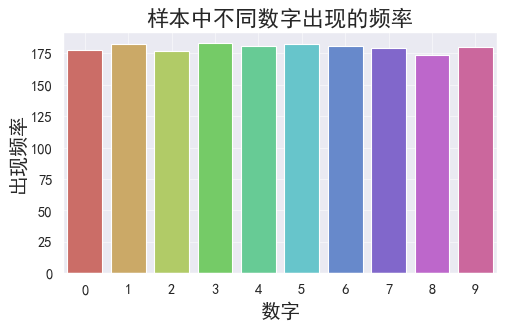

In [98]:
plt.figure(figsize=(7,4),dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')            # 解决Seaborn中文显示问题
pal = sns.color_palette("hls", 10)       # 使用seaborn调色板
sns.barplot(x=target_plot.index,y=target_plot[0],palette=pal)   # 绘制条形图
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('数字', size=18)
plt.ylabel('出现频率', size=18)
plt.title('样本中不同数字出现的频率', size=20)
plt.grid(alpha=0.5)
plt.show()

#### 3.1 高斯贝叶斯分类器

In [100]:
def test_GaussianNB(*data):
    X_train,X_test,y_train,y_test=data
    cls=naive_bayes.GaussianNB()
    cls.fit(X_train,y_train)
    print("Training Score:%.2f"%cls.score(X_train,y_train))
    print("Testing Score:%.2f"%cls.score(X_test,y_test))
start=timeit.default_timer()    #计算程序运行时间，求得开始时间
X_train,X_test,y_train,y_test=load_data()
test_GaussianNB(X_train,X_test,y_train,y_test)
end=timeit.default_timer()
timetest_GaussianNB=end-start
print(f'程序运行时间: {timetest_GaussianNB} Seconds')

Training Score:0.86
Testing Score:0.83
程序运行时间: 0.12625729999990654 Seconds


#### 3.2 多项式贝叶斯分类器

In [66]:
def test_MultinomialNB(*data):
    x_train,x_test,y_train, y_test=data
    cls=naive_bayes.MultinomialNB()
    cls.fit(x_train,y_train)
    print('多项式贝叶斯分类器')
    print('Training Score: %.2f' % cls.score(x_train,y_train))
    print('Testing Score: %.2f' % cls.score(x_test, y_test))
X_train,X_test,y_train,y_test=load_data()
test_MultinomialNB(X_train,X_test,y_train,y_test)

多项式贝叶斯分类器
Training Score: 0.91
Testing Score: 0.91


#### 3.3 伯努利贝叶斯分类器

In [9]:
def test_BernoulliNB(*data):
    x_train,x_test,y_train, y_test=data
    cls=naive_bayes.BernoulliNB()
    cls.fit(x_train,y_train)
    print('伯努利贝叶斯分类器')
    print('Training Score: %.2f' % cls.score(x_train,y_train))
    print('Testing Score: %.2f' % cls.score(x_test, y_test))
X_train,X_test,y_train,y_test=load_data()
test_BernoulliNB(X_train,X_test,y_train,y_test)

伯努利贝叶斯分类器
Training Score: 0.87
Testing Score: 0.85


#### 4.三种分类器的比较结果

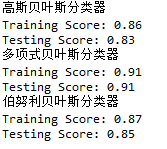